In [1]:
!pip install numpy pandas keras tensorflow biopython biopandas matplotlib spektral


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 11.8 MB/s eta 0:00:00


In [2]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/PDB str-20240520T081153Z-001.zip'  # Replace with the actual path of the uploaded zip file

# Specify the directory where you want to extract the contents
extraction_path = '/content/extracted_folder'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

Center of mass for /content/extracted_folder/PDB str/AF-Q72GK7-F1-model_v4.pdb: [-2.76058673  6.67401088 -3.44338608]
Center of mass for /content/extracted_folder/PDB str/AF-Q72GR3-F1-model_v4.pdb: [-0.03605664  1.62662658 -1.27188644]
Center of mass for /content/extracted_folder/PDB str/AF-Q5SJ47-F1-model_v4.pdb: [ 3.35315881  0.32891468 -1.56453267]
Center of mass for /content/extracted_folder/PDB str/AF-Q72IX8-F1-model_v4.pdb: [ 2.19097863  1.09602044 -2.74879145]
Center of mass for /content/extracted_folder/PDB str/AF-Q72HX7-F1-model_v4.pdb: [ 11.43699553  -4.06528257 -10.49236026]
Center of mass for /content/extracted_folder/PDB str/AF-P61989-F1-model_v4.pdb: [1.59603793 3.64558206 1.959624  ]
Center of mass for /content/extracted_folder/PDB str/AF-Q6L0H3-F1-model_v4.pdb: [ 1.49777325 -0.54787691 -0.68778811]
Center of mass for /content/extracted_folder/PDB str/AF-Q6KZT5-F1-model_v4.pdb: [ 0.43704986  1.66039751 -0.02227285]
Center of mass for /content/extracted_folder/PDB str/AF-

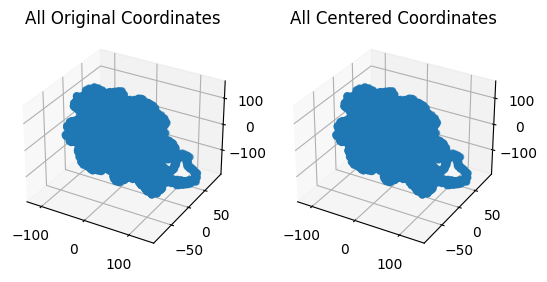

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from biopandas.pdb import PandasPdb
from sklearn.model_selection import train_test_split

def preprocess_pdb(pdb_file, grid_size=(60, 60, 60)):
    ppdb = PandasPdb().read_pdb(pdb_file)
    atoms = ppdb.df['ATOM']

    coords = atoms[['x_coord', 'y_coord', 'z_coord']].values

    # Calculate the center of mass
    center_of_mass = np.mean(coords, axis=0)
    print(f"Center of mass for {pdb_file}: {center_of_mass}")

    # Subtract the center of mass from coordinates to move the protein to the origin
    coords -= center_of_mass

    min_coords = coords.min(axis=0)
    max_coords = coords.max(axis=0)
    norm_coords = (coords - min_coords) / (max_coords - min_coords) * (np.array(grid_size) - 1)

    grid = np.zeros(grid_size)

    for coord in norm_coords.astype(int):
        grid[tuple(coord)] += 1

    return coords, grid

# Paths
pdb_dir = '/content/extracted_folder/PDB str'
melting_temps_file = '/content/PDB+TM - Sheet1 (1).csv'  # Assuming a CSV with columns 'pdb_file' and 'melting_temp'

# Load melting temperatures
melting_temps = pd.read_csv(melting_temps_file)

# Initialize arrays to store grids and labels
all_original_coords = []
all_centered_coords = []
grids = []
labels = []

# Process each PDB file
for idx, row in melting_temps.iterrows():
    pdb_file = os.path.join(pdb_dir, row['pdb_file'])
    coords, grid = preprocess_pdb(pdb_file)
    all_original_coords.append(coords + np.mean(coords, axis=0))  # Adding back center of mass for original coords
    all_centered_coords.append(coords)
    grids.append(grid)
    labels.append(row['melting_temp'])

# Convert lists to numpy arrays
all_original_coords = np.vstack(all_original_coords)
all_centered_coords = np.vstack(all_centered_coords)

# Plot all original coordinates
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(all_original_coords[:, 0], all_original_coords[:, 1], all_original_coords[:, 2])
ax.set_title('All Original Coordinates')

# Plot all centered coordinates
ax = fig.add_subplot(122, projection='3d')
ax.scatter(all_centered_coords[:, 0], all_centered_coords[:, 1], all_centered_coords[:, 2])
ax.set_title('All Centered Coordinates')
plt.show()

# Convert to numpy arrays
X = np.array(grids)
y = np.array(labels)

# Reshape X to add channel dimension
X = X[..., np.newaxis]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Center of mass for /content/extracted_folder/PDB str/AF-Q72GK7-F1-model_v4.pdb: [-2.76058673  6.67401088 -3.44338608]
Center of mass for /content/extracted_folder/PDB str/AF-Q72GR3-F1-model_v4.pdb: [-0.03605664  1.62662658 -1.27188644]
Center of mass for /content/extracted_folder/PDB str/AF-Q5SJ47-F1-model_v4.pdb: [ 3.35315881  0.32891468 -1.56453267]
Center of mass for /content/extracted_folder/PDB str/AF-Q72IX8-F1-model_v4.pdb: [ 2.19097863  1.09602044 -2.74879145]
Center of mass for /content/extracted_folder/PDB str/AF-Q72HX7-F1-model_v4.pdb: [ 11.43699553  -4.06528257 -10.49236026]
Center of mass for /content/extracted_folder/PDB str/AF-P61989-F1-model_v4.pdb: [1.59603793 3.64558206 1.959624  ]
Center of mass for /content/extracted_folder/PDB str/AF-Q6L0H3-F1-model_v4.pdb: [ 1.49777325 -0.54787691 -0.68778811]
Center of mass for /content/extracted_folder/PDB str/AF-Q6KZT5-F1-model_v4.pdb: [ 0.43704986  1.66039751 -0.02227285]
Center of mass for /content/extracted_folder/PDB str/AF-

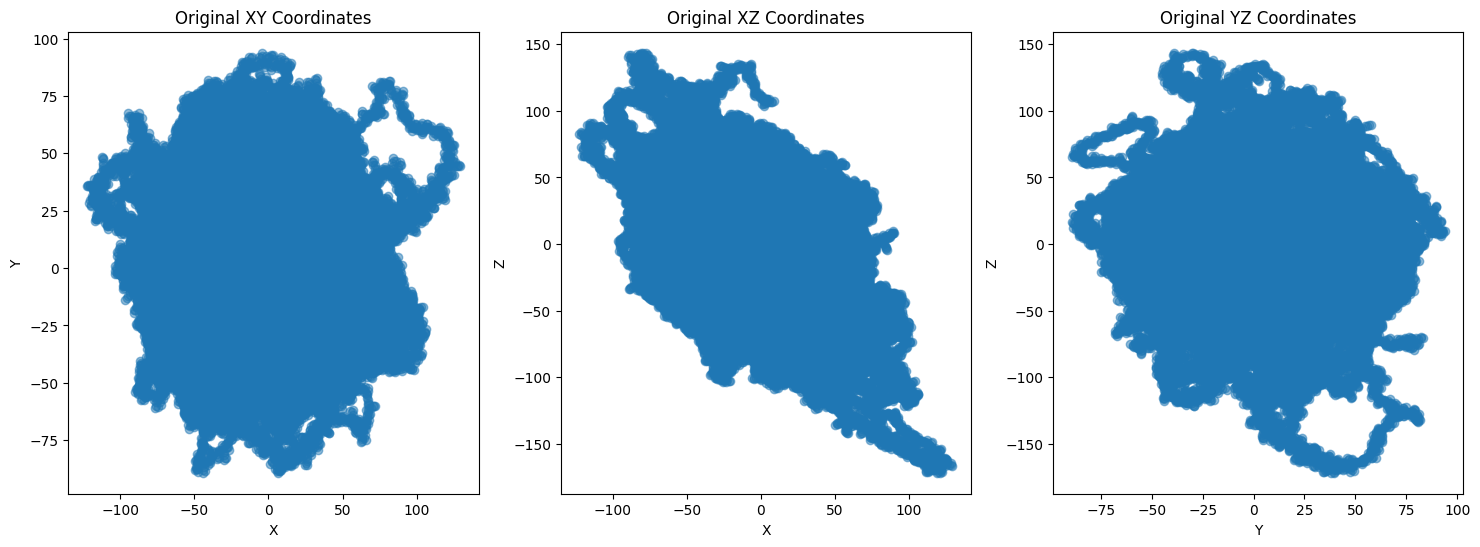

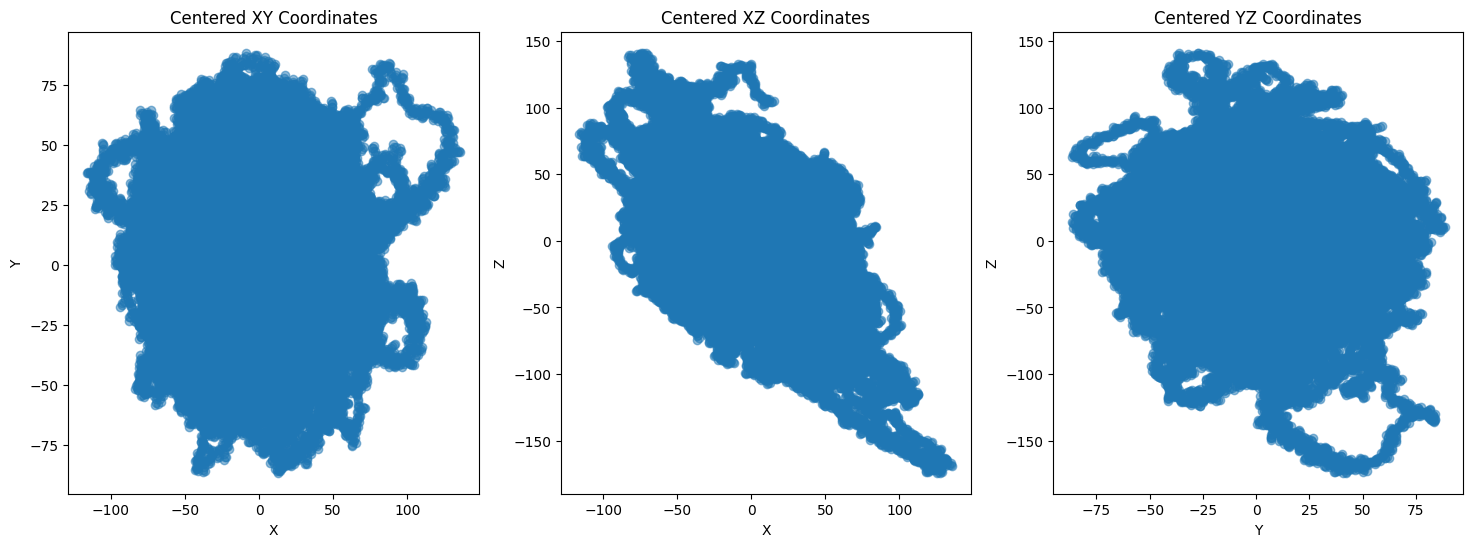

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biopandas.pdb import PandasPdb
from sklearn.model_selection import train_test_split

def preprocess_pdb(pdb_file, grid_size=(60, 60, 60)):
    ppdb = PandasPdb().read_pdb(pdb_file)
    atoms = ppdb.df['ATOM']

    coords = atoms[['x_coord', 'y_coord', 'z_coord']].values

    # Calculate the center of mass
    center_of_mass = np.mean(coords, axis=0)
    print(f"Center of mass for {pdb_file}: {center_of_mass}")

    # Subtract the center of mass from coordinates to move the protein to the origin
    centered_coords = coords - center_of_mass

    min_coords = centered_coords.min(axis=0)
    max_coords = centered_coords.max(axis=0)
    norm_coords = (centered_coords - min_coords) / (max_coords - min_coords) * (np.array(grid_size) - 1)

    grid = np.zeros(grid_size)

    for coord in norm_coords.astype(int):
        grid[tuple(coord)] += 1

    return coords, centered_coords, grid

# Paths
pdb_dir = '/content/extracted_folder/PDB str'
melting_temps_file = '/content/PDB+TM - Sheet1 (1).csv'  # Assuming a CSV with columns 'pdb_file' and 'melting_temp'

# Load melting temperatures
melting_temps = pd.read_csv(melting_temps_file)

# Initialize arrays to store grids and labels
all_original_coords = []
all_centered_coords = []
grids = []
labels = []

# Process each PDB file
for idx, row in melting_temps.iterrows():
    pdb_file = os.path.join(pdb_dir, row['pdb_file'])
    original_coords, centered_coords, grid = preprocess_pdb(pdb_file)
    all_original_coords.append(original_coords)
    all_centered_coords.append(centered_coords)
    grids.append(grid)
    labels.append(row['melting_temp'])

# Convert lists to numpy arrays
all_original_coords = np.vstack(all_original_coords)
all_centered_coords = np.vstack(all_centered_coords)

# Plot all original coordinates in 2D
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(all_original_coords[:, 0], all_original_coords[:, 1], alpha=0.5)
axes[0].set_title('Original XY Coordinates')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].scatter(all_original_coords[:, 0], all_original_coords[:, 2], alpha=0.5)
axes[1].set_title('Original XZ Coordinates')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')

axes[2].scatter(all_original_coords[:, 1], all_original_coords[:, 2], alpha=0.5)
axes[2].set_title('Original YZ Coordinates')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('Z')

plt.show()

# Plot all centered coordinates in 2D
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(all_centered_coords[:, 0], all_centered_coords[:, 1], alpha=0.5)
axes[0].set_title('Centered XY Coordinates')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].scatter(all_centered_coords[:, 0], all_centered_coords[:, 2], alpha=0.5)
axes[1].set_title('Centered XZ Coordinates')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Z')

axes[2].scatter(all_centered_coords[:, 1], all_centered_coords[:, 2], alpha=0.5)
axes[2].set_title('Centered YZ Coordinates')
axes[2].set_xlabel('Y')
axes[2].set_ylabel('Z')

plt.show()

# Convert to numpy arrays
X = np.array(grids)
y = np.array(labels)

# Reshape X to add channel dimension
X = X[..., np.newaxis]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 4188.0933 - mae: 61.6695 - val_loss: 3227.1289 - val_mae: 52.6797
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - loss: 1987.0688 - mae: 39.5477 - val_loss: 1048.7267 - val_mae: 26.1913
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 1739.5128 - mae: 29.7657 - val_loss: 1305.0254 - val_mae: 30.5456
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 1327.9220 - mae: 30.4957 - val_loss: 1059.7925 - val_mae: 27.4766
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - loss: 1220.9829 - mae: 28.6254 - val_loss: 855.0626 - val_mae: 25.2040
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - loss: 1170.8595 - mae: 27.2377 - val_loss: 976.0964 - val_mae: 26.3708
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 981.2277 - mae: 25.3940 - val_loss: 787.9567 - val_mae: 24.2324
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 908.2510 - mae: 24.5753 - val_loss: 786.2244 - val_mae: 24.0529
Epoch 9

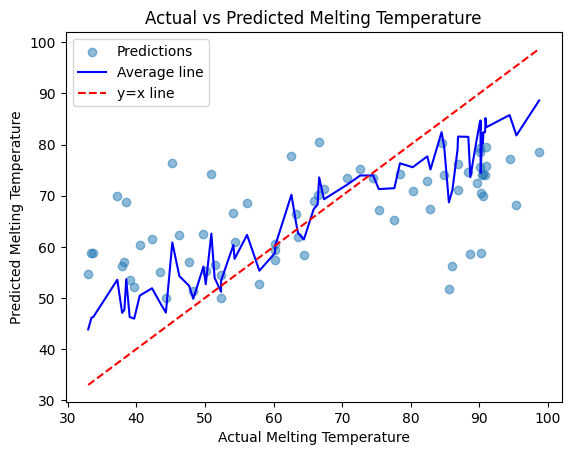

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

def build_refined_3d_cnn(input_shape=(60, 60, 60, 1)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape,
                               kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
        tf.keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu',
                               kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
        tf.keras.layers.Conv3D(128, kernel_size=(3, 3, 3), activation='relu',
                               kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])
    return model

# Build the refined model
model = build_refined_3d_cnn(input_shape=(60, 60, 60, 1))


# Define early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/best_model.keras', save_best_only=True, monitor='val_loss')

# Train the refined model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Save the best model
model.save('/content/saved_model_improved6.keras')
# Evaluate the refined model on the test set
test_loss, test_mae = model.evaluate(X_val, y_val)
print(f'Test MAE: {test_mae}')

# Predict melting temperatures for the test set
y_pred = model.predict(X_val).flatten()

# Calculate R2
r2 = r2_score(y_val, y_pred)
print(f'R2: {r2}')

# Calculate Pearson correlation coefficient (P)
pearson_corr, _ = pearsonr(y_val, y_pred)
print(f'Pearson correlation coefficient (P): {pearson_corr}')

# Calculate root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')

# Calculate average of each actual and predicted value
avg_values = (y_val + y_pred) / 2

# Sort the actual values and their corresponding average values for plotting
sorted_indices = np.argsort(y_val)
sorted_y_val = y_val[sorted_indices]
sorted_avg_values = avg_values[sorted_indices]

# Create a scatter plot of actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred, alpha=0.5, label='Predictions')
plt.plot(sorted_y_val, sorted_avg_values, color='blue', label='Average line')  # Plot average line
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='y=x line')  # Add line y=x
plt.xlabel('Actual Melting Temperature')
plt.ylabel('Predicted Melting Temperature')
plt.title('Actual vs Predicted Melting Temperature')
plt.legend()
plt.show()

# Save actual and predicted values to a CSV file
import pandas as pd

results_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Average': avg_values})
results_df.to_csv('/content/actual_vs_predicted_improved6.csv', index=False)


In [19]:
import os
import zipfile

def zip_and_download(file_path, zip_file_name):
    # Create a zip file
    with zipfile.ZipFile(zip_file_name, 'w') as zipf:
        # Add the specified file to the zip file
        zipf.write(file_path, os.path.basename(file_path))

    print(f"Created zip file: {zip_file_name}")

# Example usage
file_path = '/content/saved_model_improved6.keras'
zip_file_name = '/content/best_model_CNN_FINAL.zip'

# Call the function to zip and download
zip_and_download(file_path, zip_file_name)


Created zip file: /content/best_model_CNN_FINAL.zip


In [20]:
def preprocess_pdb(pdb_file, grid_size=(60, 60, 60)):
    ppdb = PandasPdb().read_pdb(pdb_file)
    atoms = ppdb.df['ATOM']

    coords = atoms[['x_coord', 'y_coord', 'z_coord']].values

    # Calculate the center of mass
    center_of_mass = np.mean(coords, axis=0)
    print(f"Center of mass for {pdb_file}: {center_of_mass}")

    # Subtract the center of mass from coordinates to move the protein to the origin
    coords -= center_of_mass

    min_coords = coords.min(axis=0)
    max_coords = coords.max(axis=0)
    norm_coords = (coords - min_coords) / (max_coords - min_coords) * (np.array(grid_size) - 1)

    grid = np.zeros(grid_size)

    for coord in norm_coords.astype(int):
        grid[tuple(coord)] += 1

    return grid  # Return only the grid

# And update the function call accordingly
def predict_tm_for_new_pdb(new_pdb_file):
    # Preprocess the new PDB file to convert it into a 3D grid
    grid = preprocess_pdb(new_pdb_file, grid_size=(60, 60, 60))  # Only use the grid part of the tuple
    # Reshape the grid to match the input shape expected by the model
    grid = np.reshape(grid, (1, 60, 60, 60, 1))
    # Use the model to predict the TM of the new PDB
    tm_pred = loaded_model.predict(grid)[0][0]
    return tm_pred


In [21]:
# Load the saved model
saved_model_path = '/content/saved_model_improved6.keras'

# Load the model
loaded_model = tf.keras.models.load_model(saved_model_path)

def predict_tm_for_new_pdb(new_pdb_file):
    # Preprocess the new PDB file to convert it into a 3D grid
    grid = preprocess_pdb(new_pdb_file, grid_size=(60, 60, 60))
    # Reshape the grid to match the input shape expected by the model
    grid = np.reshape(grid, (1, 60, 60, 60, 1))
    # Use the model to predict the TM of the new PDB
    tm_pred = loaded_model.predict(grid)[0][0]
    return tm_pred

# Example usage:
new_pdb_file = '/content/6ezq.pdb'
tm_prediction = predict_tm_for_new_pdb(new_pdb_file)
print(f'Predicted TM: {tm_prediction}')

Center of mass for /content/6ezq.pdb: [-34.08058269  15.36950633  30.23699593]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Predicted TM: 67.10240173339844
